# Lab 6
The goal of this practical is to investigate Markov random field models. For this lab we are specifying the models and the distributions being used. We will be focusing only on _inference_. This lab is broken down into three parts:
- [Part A](#Part-A:-Small-five-link-model): investigating a small five link model.
- [Part B](PartB.ipynb): sampling from probability distributions using MCMC methods (Markov Chain Monte Carlo).
- [Part C](PartC.ipynb): using what you have learned to sample from an MRF.

# Part A: Small five-link model
For this part we will use this simple graphical model:

<img src="Figures/model1.svg" style="width: 50%;"/>

All of the variables are binary, and the nodes are all connected by _undirected_ edges. For this part we will first compute the discrete distribution over all configurations and then use this to draw samples from the model.

### Import modules

In [1]:
import itertools

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from visualisation import plot_binary_vector, display_table

# Define graphical model
We are using the array `W` to hold the $2^5 = 32$ possible configurations of the graphical model described above, consisting of 5 binary variables. The corresponding probabilities will be given by `pr_W`.

In [2]:
W = np.zeros((32, 5), dtype=np.uint)
pr_W = np.zeros(32)

edges = [(0, 1), (1, 2), (2, 3), (3, 4)]

# Compute unnormalised potentials

### TO DO: Computing the potential function $\phi$
Fill in this method with the potential function $\phi$ as given in the smoothing example in the notes (Slides 10 to 12). Then use this method to evaluate over all variables.

In [3]:
def phi(label1, label2):
    '''
    Function to evaluate the potential function phi
    Input:
     - label1: label of node 1
     - label2: label of node 2
    Output:
     - phi_value: value of function phi evaluated on (label1,label2)
    '''
    if (label1 == label2):
        return 1.0
    else: 
        return 0.1

Using function $\phi$ we can now evaluate the unnormalised potential for every configurations of the binary variables $w_{1...5}$

In [4]:
def binary_combinations(num_variables): 
    '''
    Function to get all possible binary configurations for a given number of variables
    Input:
     - num_variables: number of binary variables
    Output:
     - binary_combinations: itertools object iterating over all possible configurations for binary variables
       Ex (for num_variables=3): (0,0,0),(1,0,0),(0,1,0),(0,0,1),(1,1,0),(0,1,1),(1,0,1),(1,1,1)
    '''
    return itertools.product(range(2), repeat=num_variables)

for index, w in enumerate(binary_combinations(num_variables=5)):
    # TO DO: replace this
    pr_W[index] = phi(w[0],w[1])*phi(w[1],w[2])*phi(w[2],w[3])*phi(w[3],w[4])*phi(w[4],w[5])
    W[index] = w

# Convert potentials to distribution
### TO DO: Normalizing the potential $\phi$
Compute the normalizing constant $Z$, and use this to ensure that `pr_W` represents a valid probability distribution.

In [5]:
# TO DO: replace this
Z = (pr_W).sum()

pr_W /= Z

### Validating over all configurations

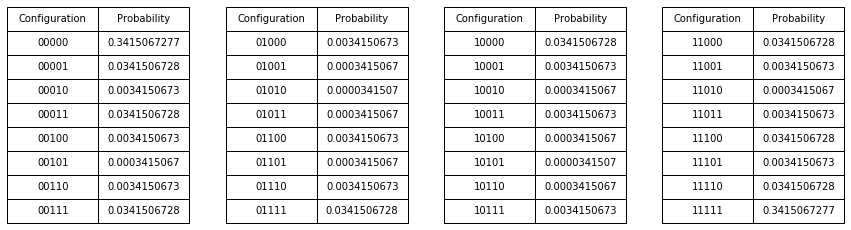

In [6]:
with display_table(column_names=('Configuration', 'Probability')) as table:

    for w, p in zip(W, pr_W):
        table.add_row(('{:d}{:d}{:d}{:d}{:d}'.format(*w), '{:.10f}'.format(p)))

### TO DO: Increasing the precision of the value table
Some combinations may appear to have zero probability, when it's really very small but non-zero. Fix the above print statement to make this clearer.

Hint: How could you increase the precision of the numbers printed?

# Generate samples

### TO DO: Sampling from discrete distribution
Replace the `!=` below with some other relationship: greater than, less than, or equal?

This relationship can therefore be written as: "if height is `??` compared to the probability value at this point in the histogram, then select this sample" with `??` one of the three previous relationships.

In [15]:
def sample_from_discrete(distribution):
    '''
    Function to sample from a discrete distribution
    Input:
     - distribution: given discrete distribution
    Output:
     - r: sampled value from the distribution
    '''
    while True:
        r = np.random.randint(len(distribution))
        random_height = np.random.rand()
        
        # TO DO
        if random_height < distribution[r]:
            return r
            

Using this rejection sampling method we can draw samples from our discrete distribution $Pr(W)$ and visualise them. What we would expect is that they should tend to show a single colour, or at least very few changes between adjacent variables. Try to give an explanation for that.

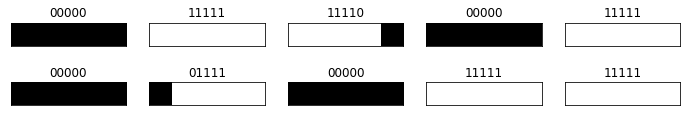

In [16]:
fig, axes = plt.subplots(2, 5, figsize=(12, 2))

for ax in axes.flatten():
    configuration_index = sample_from_discrete(pr_W)
    sample = W[configuration_index]
    plot_binary_vector(sample, ax)

## TO DO: Try with another graphical model
Now change the graphical model and run the above algorithm again: add an undirected edge between $w_5$ and $w_1$
<img src="Figures/model2.svg" style="width: 50%;"/>